# 2020 Bay Wheels Ride Data Exploration and Visualization
## by Osama Ghozlan

## Preliminary Wrangling

> Bay Wheels is the first regional public large-scale bicycle sharing system in California's San Francisco Bay Area and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. Each trip data is anonymously collected and includes details such trip duration, start/end Time and date and so on

In [1]:
# !rm -rfv .

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20200919115139-0000
KERNEL_ID = 2e2c630e-4c18-4ab1-9eb6-3ea603a24858


In [2]:
# Cleaning out work folder
!rm *.csv
!rm -rfv __MACOSX

rm: cannot remove ‘*.csv’: No such file or directory


In [3]:
# Download the 2020 dataset from website 
!wget -O 202001-baywheels-tripdata.csv.zip https://s3.amazonaws.com/baywheels-data/202001-baywheels-tripdata.csv.zip
!wget -O 202002-baywheels-tripdata.csv.zip https://s3.amazonaws.com/baywheels-data/202002-baywheels-tripdata.csv.zip
!wget -O 202003-baywheels-tripdata.csv.zip https://s3.amazonaws.com/baywheels-data/202003-baywheels-tripdata.csv.zip
!wget -O 202004-baywheels-tripdata.csv.zip https://s3.amazonaws.com/baywheels-data/202004-baywheels-tripdata.csv.zip
!wget -O 202005-baywheels-tripdata.csv.zip https://s3.amazonaws.com/baywheels-data/202005-baywheels-tripdata.csv.zip
!wget -O 202006-baywheels-tripdata.csv.zip https://s3.amazonaws.com/baywheels-data/202006-baywheels-tripdata.csv.zip
!wget -O 202007-baywheels-tripdata.csv.zip https://s3.amazonaws.com/baywheels-data/202007-baywheels-tripdata.csv.zip
!wget -O 202008-baywheels-tripdata.csv.zip https://s3.amazonaws.com/baywheels-data/202008-baywheels-tripdata.csv.zip

--2020-09-19 11:51:43--  https://s3.amazonaws.com/baywheels-data/202001-baywheels-tripdata.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.18.115
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.18.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9934176 (9.5M) [application/zip]
Saving to: ‘202001-baywheels-tripdata.csv.zip’

100%[======================================>] 9,934,176   31.2MB/s   in 0.3s   

2020-09-19 11:51:44 (31.2 MB/s) - ‘202001-baywheels-tripdata.csv.zip’ saved [9934176/9934176]

--2020-09-19 11:51:45--  https://s3.amazonaws.com/baywheels-data/202002-baywheels-tripdata.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.18.115
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.18.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14551210 (14M) [application/zip]
Saving to: ‘202002-baywheels-tripdata.csv.zip’

100%[======================================>] 14,551,210  36.7

In [4]:
# Extracting all folders as each zip file contains data of each month seperately
!unzip \*-baywheels-tripdata.csv.zip

Archive:  202001-baywheels-tripdata.csv.zip
  inflating: 202001-baywheels-tripdata.csv  
   creating: __MACOSX/
  inflating: __MACOSX/._202001-baywheels-tripdata.csv  

Archive:  202002-baywheels-tripdata.csv.zip
  inflating: 202002-baywheels-tripdata.csv  
  inflating: __MACOSX/._202002-baywheels-tripdata.csv  

Archive:  202003-baywheels-tripdata.csv.zip
  inflating: 202003-baywheels-tripdata.csv  
  inflating: __MACOSX/._202003-baywheels-tripdata.csv  

Archive:  202004-baywheels-tripdata.csv.zip
  inflating: 202004-baywheels-tripdata.csv  
  inflating: __MACOSX/._202004-baywheels-tripdata.csv  

Archive:  202005-baywheels-tripdata.csv.zip
  inflating: 202005-baywheels-tripdata.csv  
  inflating: __MACOSX/._202005-baywheels-tripdata.csv  

Archive:  202006-baywheels-tripdata.csv.zip
  inflating: 202006-baywheels-tripdata.csv  
  inflating: __MACOSX/._202006-baywheels-tripdata.csv  

Archive:  202007-baywheels-tripdata.csv.zip
  inflating: 202007-baywheels-tripdata.csv  
  inflating:

In [5]:
# Checking the layout of the file
!head -n 3 202001-baywheels-tripdata.csv

duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
83118,2020-01-31 15:23:47.7330,2020-02-01 14:29:06.2630,400,Buchanan St at North Point St,37.8042720199,-122.4335369468,400,Buchanan St at North Point St,37.8042720199,-122.4335369468,13052,Customer,
68239,2020-01-31 15:40:31.6160,2020-02-01 10:37:51.0000,99,Folsom St at 15th St,37.7670373,-122.4154425,99,Folsom St at 15th St,37.7670373,-122.4154425,12235,Subscriber,


In [6]:
# Checking the layout of the file as there were changes made to the features that were collected as of April 2020
!head -n 3 202004-baywheels-tripdata.csv

In [7]:
from pip._internal import main

try:
    __import__('folium')
except ImportError:
    main(['install', 'folium']) 

In [8]:
# import all packages and set plots to be embedded inline
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import folium
from geopy.distance import distance as g_dist


%matplotlib inline

In [9]:
# trips20_q1 = pd.concat([pd.read_csv(f"20200{i}-baywheels-tripdata.csv", na_values=) for i in range(1, 4)], sort=True)
# trips20_q2 = pd.concat([pd.read_csv(f"20200{i}-baywheels-tripdata.csv", na_values=) for i in range(4, 9)], sort=True)

# Load data of months January to March
trips20_q1 = pd.concat([pd.read_csv(f"20200{i}-baywheels-tripdata.csv") for i in range(1, 4)], sort=True)

# Load data of months April to August
trips20_q2 = pd.concat([pd.read_csv(f"20200{i}-baywheels-tripdata.csv") for i in range(4, 9)], sort=True)

/opt/ibm/conda/miniconda3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2818: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [10]:
# Renaming columns which are the same data but under a different alias

# trips20_q1.rename(columns={'end_time' : 'ended_at', 'start_time' : 'started_at', 'member_casual' : 'user_type'}, inplace=True)
trips20_q1.rename(columns={'end_time' : 'ended_at', 'start_time' : 'started_at',
                           'end_station_latitude' : 'end_lat', 'end_station_longitude' : 'end_lng',
                           'start_station_latitude' : 'start_lat', 'start_station_longitude' : 'start_lng'}, inplace=True)
trips20_q2.rename(columns={'member_casual' : 'user_type'}, inplace=True)

In [11]:
# Verifying rename

trips20_q1.head(3)

,bike_id,duration_sec,end_station_id,end_lat,end_lng,end_station_name,ended_at,rental_access_method,start_station_id,start_lat,start_lng,start_station_name,started_at,user_type
0,13052,83118,400.0,37.804272,-122.433537,Buchanan St at North Point St,2020-02-01 14:29:06.2630,NaN,400.0,37.804272,-122.433537,Buchanan St at North Point St,2020-01-31 15:23:47.7330,Customer
1,12235,68239,99.0,37.767037,-122.415443,Folsom St at 15th St,2020-02-01 10:37:51.0000,NaN,99.0,37.767037,-122.415443,Folsom St at 15th St,2020-01-31 15:40:31.6160,Subscriber
2,12822,55407,197.0,37.808848,-122.249680,El Embarcadero at Grand Ave,2020-02-01 09:11:44.3170,NaN,197.0,37.808848,-122.249680,El Embarcadero at Grand Ave,2020-01-31 17:48:16.6350,Customer


In [12]:
# Verifying rename

trips20_q2.head(3)

,end_lat,end_lng,end_station_id,end_station_name,ended_at,is_equity,user_type,ride_id,rideable_type,start_lat,start_lng,start_station_id,start_station_name,started_at
0,37.7703,-122.4069,NaN,NaN,2020-04-04 08:33:34,NaN,casual,5A1FF31692371859,electric_bike,37.7692,-122.4209,NaN,NaN,2020-04-04 08:28:20
1,37.8023,-122.4244,NaN,NaN,2020-04-03 19:21:05,NaN,casual,D8D5BA2D4F051133,electric_bike,37.8023,-122.4244,NaN,NaN,2020-04-03 18:55:43
2,37.7667,-122.3962,NaN,NaN,2020-04-04 15:12:21,NaN,casual,A3633A9140CA4FF8,electric_bike,37.7667,-122.3961,NaN,NaN,2020-04-04 15:11:04


In [13]:
# Viewing features and their data type

trips20_q1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905007 entries, 0 to 176798
Data columns (total 14 columns):
bike_id                 905007 non-null int64
duration_sec            905007 non-null int64
end_station_id          419225 non-null float64
end_lat                 905007 non-null float64
end_lng                 905007 non-null float64
end_station_name        420499 non-null object
ended_at                905007 non-null object
rental_access_method    617858 non-null object
start_station_id        418705 non-null float64
start_lat               905007 non-null float64
start_lng               905007 non-null float64
start_station_name      419938 non-null object
started_at              905007 non-null object
user_type               905007 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 103.6+ MB


In [14]:
# Viewing features and their data type

trips20_q2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688091 entries, 0 to 152445
Data columns (total 14 columns):
end_lat               687053 non-null float64
end_lng               687053 non-null float64
end_station_id        435544 non-null float64
end_station_name      435544 non-null object
ended_at              688091 non-null object
is_equity             138251 non-null object
user_type             688091 non-null object
ride_id               688091 non-null object
rideable_type         688091 non-null object
start_lat             688091 non-null float64
start_lng             688091 non-null float64
start_station_id      446764 non-null float64
start_station_name    446764 non-null object
started_at            688091 non-null object
dtypes: float64(6), object(8)
memory usage: 78.7+ MB


In [15]:
# Getting a statistical summary of numeric data in the dataset

trips20_q1.describe()

,bike_id,duration_sec,end_station_id,end_lat,end_lng,start_station_id,start_lat,start_lng
count,905007.000000,905007.000000,419225.000000,905007.000000,905007.000000,418705.000000,905007.000000,905007.000000
mean,345257.165427,806.783430,168.499295,37.747504,-122.354743,175.490438,37.747956,-122.356863
std,305503.123238,1651.803494,145.618964,0.270214,0.795225,146.361852,0.229245,0.646076
min,12.000000,60.000000,3.000000,0.000000,-122.575763,3.000000,0.000000,-122.514230
25%,12114.000000,370.000000,44.000000,37.765464,-122.419957,56.000000,37.765281,-122.420664
50%,326439.000000,595.000000,116.000000,37.777062,-122.403681,123.000000,37.776972,-122.404635
75%,557460.000000,932.000000,265.000000,37.790229,-122.392741,275.000000,37.789914,-122.392741
max,999960.000000,811077.000000,521.000000,37.995942,0.000000,521.000000,37.880222,0.000000


In [16]:
# Getting a statistical summary of numeric data in the dataset

trips20_q2.describe()

,end_lat,end_lng,end_station_id,start_lat,start_lng,start_station_id
count,687053.000000,687053.000000,435544.000000,688091.000000,688091.000000,446764.000000
mean,37.726114,-122.346681,221.903936,37.726157,-122.348618,224.847009
std,0.153650,0.449651,171.103456,0.146684,0.176975,171.051518
min,0.000000,-122.559000,3.000000,37.239200,-122.514300,3.000000
25%,37.760000,-122.432400,73.000000,37.760000,-122.432590,73.000000
50%,37.773539,-122.412000,148.000000,37.773600,-122.412083,160.000000
75%,37.788100,-122.391000,383.000000,37.787700,-122.390925,384.000000
max,37.962100,0.000000,538.000000,37.880222,-121.770000,538.000000


In [17]:
# Find unique values in the data

trips20_q1.nunique()

bike_id                  10233
duration_sec              8742
end_station_id             445
end_lat                 283469
end_lng                 298745
end_station_name           452
ended_at                847915
rental_access_method         2
start_station_id           446
start_lat               281827
start_lng               296256
start_station_name         453
started_at              848251
user_type                    2
dtype: int64

In [18]:
# Find unique values in the data

trips20_q2.nunique()

end_lat               102917
end_lng               110785
end_station_id           460
end_station_name         465
ended_at              655000
is_equity                  2
user_type                  2
ride_id               688091
rideable_type              2
start_lat              99776
start_lng             107482
start_station_id         455
start_station_name       460
started_at            655929
dtype: int64

In [19]:
# Check for duplicates

trips20_q1.duplicated().sum()

7512

In [20]:
# Check for duplicates

trips20_q2.duplicated().sum()

0

In [21]:
# Check from null entries

trips20_q1.isnull().sum()

bike_id                      0
duration_sec                 0
end_station_id          485782
end_lat                      0
end_lng                      0
end_station_name        484508
ended_at                     0
rental_access_method    287149
start_station_id        486302
start_lat                    0
start_lng                    0
start_station_name      485069
started_at                   0
user_type                    0
dtype: int64

In [22]:
# Check from null entries

trips20_q2.isnull().sum()

end_lat                 1038
end_lng                 1038
end_station_id        252547
end_station_name      252547
ended_at                   0
is_equity             549840
user_type                  0
ride_id                    0
rideable_type              0
start_lat                  0
start_lng                  0
start_station_id      241327
start_station_name    241327
started_at                 0
dtype: int64

In [23]:
# Get number of rows in the data

len(trips20_q1)

905007

In [24]:
# Get number of rows in the data

len(trips20_q2)

688091

In [25]:
# Find common features in data files

set(trips20_q2.columns).intersection(set(trips20_q1.columns))

{'end_lat',
 'end_lng',
 'end_station_id',
 'end_station_name',
 'ended_at',
 'start_lat',
 'start_lng',
 'start_station_id',
 'start_station_name',
 'started_at',
 'user_type'}

In [26]:
# Creating copy of data to perform some processing on

trips20_q1_c = trips20_q1.copy().drop_duplicates()
trips20_q2_c = trips20_q2.copy().drop_duplicates()

In [27]:
# Setting features to an appropriate data type and adding new features

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
months = [datetime.datetime(2020, i, 1).strftime('%B') for i in range(1, 13)]
day_category = pd.api.types.CategoricalDtype(ordered=True, categories=weekdays)
month_category = pd.api.types.CategoricalDtype(ordered=True, categories=months)
for frame in [trips20_q1_c, trips20_q2_c]:
    frame['started_at'] = pd.to_datetime(frame['started_at'])
    frame['ended_at'] = pd.to_datetime(frame['ended_at'])
    frame['end_station_id'] = frame['end_station_id'].astype('str')
    frame['start_station_id'] = frame['start_station_id'].astype('str')
    frame['started_at_hour'] = frame['started_at'].dt.strftime('%H')
    frame['started_at_day'] = frame['started_at'].dt.strftime('%A').astype(day_category)
    frame['started_at_month'] = frame['started_at'].dt.strftime('%B').astype(month_category)
    if 'duration_sec' not in frame.columns:
        secs = abs(frame['ended_at'] - frame['started_at'])
        frame['duration_sec'] = secs.dt.seconds
    if 'is_equity' in frame.columns:
        frame['user_type'] = frame['user_type'].str.replace("member", "Subscriber", case=False, regex=False)
        frame['user_type'] = frame['user_type'].str.replace("casual", "Customer", case=False, regex=False)
    frame['user_type'] = frame['user_type'].astype('category')
    frame['duration_min'] = frame['duration_sec'] / 60

In [28]:
# Checking added features in first dataframe (Jan-Mar)

trips20_q1_c.head(3)

,bike_id,duration_sec,end_station_id,end_lat,end_lng,end_station_name,ended_at,rental_access_method,start_station_id,start_lat,start_lng,start_station_name,started_at,user_type,started_at_hour,started_at_day,started_at_month,duration_min
0,13052,83118,400.0,37.804272,-122.433537,Buchanan St at North Point St,2020-02-01 14:29:06.263,NaN,400.0,37.804272,-122.433537,Buchanan St at North Point St,2020-01-31 15:23:47.733,Customer,15,Friday,January,1385.300000
1,12235,68239,99.0,37.767037,-122.415443,Folsom St at 15th St,2020-02-01 10:37:51.000,NaN,99.0,37.767037,-122.415443,Folsom St at 15th St,2020-01-31 15:40:31.616,Subscriber,15,Friday,January,1137.316667
2,12822,55407,197.0,37.808848,-122.249680,El Embarcadero at Grand Ave,2020-02-01 09:11:44.317,NaN,197.0,37.808848,-122.249680,El Embarcadero at Grand Ave,2020-01-31 17:48:16.635,Customer,17,Friday,January,923.450000


In [29]:
# Checking added features in second dataframe (Apr-Aug)

trips20_q2_c.head(3)

,end_lat,end_lng,end_station_id,end_station_name,ended_at,is_equity,user_type,ride_id,rideable_type,start_lat,start_lng,start_station_id,start_station_name,started_at,started_at_hour,started_at_day,started_at_month,duration_sec,duration_min
0,37.7703,-122.4069,nan,NaN,2020-04-04 08:33:34,NaN,Customer,5A1FF31692371859,electric_bike,37.7692,-122.4209,nan,NaN,2020-04-04 08:28:20,08,Saturday,April,314,5.233333
1,37.8023,-122.4244,nan,NaN,2020-04-03 19:21:05,NaN,Customer,D8D5BA2D4F051133,electric_bike,37.8023,-122.4244,nan,NaN,2020-04-03 18:55:43,18,Friday,April,1522,25.366667
2,37.7667,-122.3962,nan,NaN,2020-04-04 15:12:21,NaN,Customer,A3633A9140CA4FF8,electric_bike,37.7667,-122.3961,nan,NaN,2020-04-04 15:11:04,15,Saturday,April,77,1.283333


In [30]:
# Show on the map trips that were not a round-trip

base_loc = (37.776972, -122.404635)
vars_q = ['user_type', 'end_lat', 'end_lng', 'end_station_name', 'start_lat', 'start_lng', 'start_station_name', 'duration_min', 'started_at_month', 'started_at', 'ended_at']

# Merge data of all the months
df_temp = pd.DataFrame(trips20_q1_c[vars_q].append(trips20_q2_c[vars_q]))
df_temp = df_temp.dropna()
df_temp = df_temp[df_temp['start_station_name'] != df_temp['end_station_name']]

# Put markers for the start and end point of the trip on the map 
m = folium.Map(location=base_loc, tiles='cartodbpositron', zoom_start=15)
for idx , row in df_temp.iloc[0:100].iterrows():
    start = (row['start_lat'], row['start_lng'])
    end = (row['end_lat'], row['end_lng'])
    folium.Marker(location=start, icon=folium.Icon(color='lightblue')).add_to(m)
    folium.Marker(location=end, icon=folium.Icon(color='lightgreen')).add_to(m)
    folium.PolyLine(locations=[start, end], color='red', weight=1.25, line_opacity=0.15).add_to(m)
m

In [31]:
# Adding a new feature which is trip distance in kilometer

df_temp['trip_distance'] = df_temp.apply(lambda r: g_dist((r['start_lat'], r['start_lng']), (r['end_lat'], r['end_lng'])).km, axis=1)

In [32]:
df_temp.to_csv('df_w_dist.csv',index=False)

### What is the structure of your dataset?

The data combined from the January up to the month of August this year contains around 1,600,000 trip records with 14 variables

>* Trip Duration (seconds)
>* Start Time and Date
>* End Time and Date
>* Start Station ID
>* Start Station Name
>* Start Station Latitude
>* Start Station Longitude
>* End Station ID
>* End Station Name
>* End Station Latitude
>* End Station Longitude

These features can be divided into other categories as follows:

- Time intervals such as `start_time`, `end_time`, `duration_sec`
- Station information such as `start_station_id`, `end_station_id`, `start_station_name`, `end_station_name`, `start_lat`, `end_lat`, `end_lng`, `start_lng`
- Member related information such as `user_type`,  `is_equity`, `bike_id`, `rental_access_method`
- Additional variables for analysis and exploration such as `started_at_hour`, `started_at_day`, `started_at_month`, `trip_distance`

### What is/are the main feature(s) of interest in your dataset?

> The interesting features would be the week days, trip durations, user types and the pattern of trips throughout the months especially with the pandemic that has came down upon all the world. Many questions can be asked such as which user types were more consistent in making trips during the pandemic? Which hour(s) had the most amount of trips? Which areas were more popular?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The trip's start and end time in addition to the trip duration can provide some insight on how long a trip takes on average and when it's most likely to be taken and also the user type can determine which user category is more likely to head out for trips and can help determine which are more inclined to take longer ones

## Univariate Exploration

Below is a plot that shows the trip distances and how many rides were within each trip bin

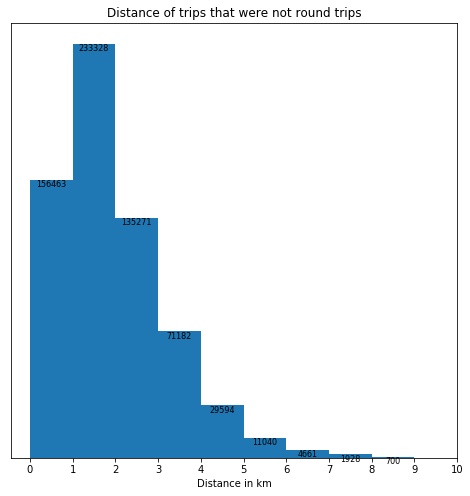

In [33]:
bins = np.arange(0, 10, 1)
plt.figure(figsize=(8,8))
plt.hist(data=df_temp, x='trip_distance', bins=bins)
axs = plt.gca()
plt.title('Distance of trips that were not round trips')
axs.set_xlabel('Distance in km')
axs.set_ylabel('Frequency/Count')
axs.get_yaxis().set_visible(False)
axs.grid(False)
axs.set_xticks(list(range(0, 11)))
for p in axs.patches:
    axs.annotate(f'{p.get_height():.0f}', 
                   (p.get_x() + p.get_width()/2, p.get_height()), 
                   ha='center', va='top', color='black', size=8)

As we can see, most trips recorded were less than 5 KMs with the mode of this figure being 2 KMs peaking at 233,478 times

In [34]:
def uniplot(x=None, var=None, rotate=False, sharex=True, sharey=True, annotate=False):
    """
    Draws a plot of a single variable for analysis
    
    Args:
        x: Data that will be plotted on X-axis
        var: Name of the variable that will be plotted (used for the axis label)
        rotate: if True, the x labels will be rotated by 60 degrees
        sharex: Make the x axis ticks common across all (sub)plots
        sharey: Make the y axis ticks common across all (sub)plots
        annotate: if True, the frequency of the variable will be displayed on the graph itself
     
     Returns:
         None
    
    """
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=[20,8], sharex=sharex, sharey=sharey)
    def_color = sb.color_palette('colorblind')[0]
    plot_var = pd.DataFrame(trips20_q1_c[x].append(trips20_q2_c[x]))
    sb.set_style('whitegrid')
    for i, (d, a) in enumerate(zip([trips20_q1_c, trips20_q2_c, plot_var], ax)):
        # print(d.sort_values([x]).sum())
        sb.countplot(data=d, x=x, color=def_color, ax=a)
        if annotate:    
            for p in a.patches:
                #a.annotate(f'{p.get_x() + .5:.0f}, va='top')
                a.annotate(f'{p.get_height():.0f}',
                           (p.get_x() + p.get_width()/2, p.get_height()), 
                           ha='center', va='bottom', color='black', size=8)
        if not i:
            a.set_xlabel(f'Starting {var} of the trip (Q{i+1}: Jan-Mar)')
            a.set_ylabel('Count')
        else:
            if i == 1:
                # a.set_xlabel(f'Starting {var} of the trip (Q{i+1}: {"Apr-Aug" if i == 1 else "Combined"})')
                a.set_xlabel(f'Starting {var} of the trip (Q{i+1}: Apr-Aug)')
            elif i == 2:
                a.set_xlabel(f'Starting {var} of the trip (Combined)')
            else:
                pass
            a.set_ylabel('')
        if rotate:    
            a.tick_params(axis='x', labelrotation=60)
    plt.show()

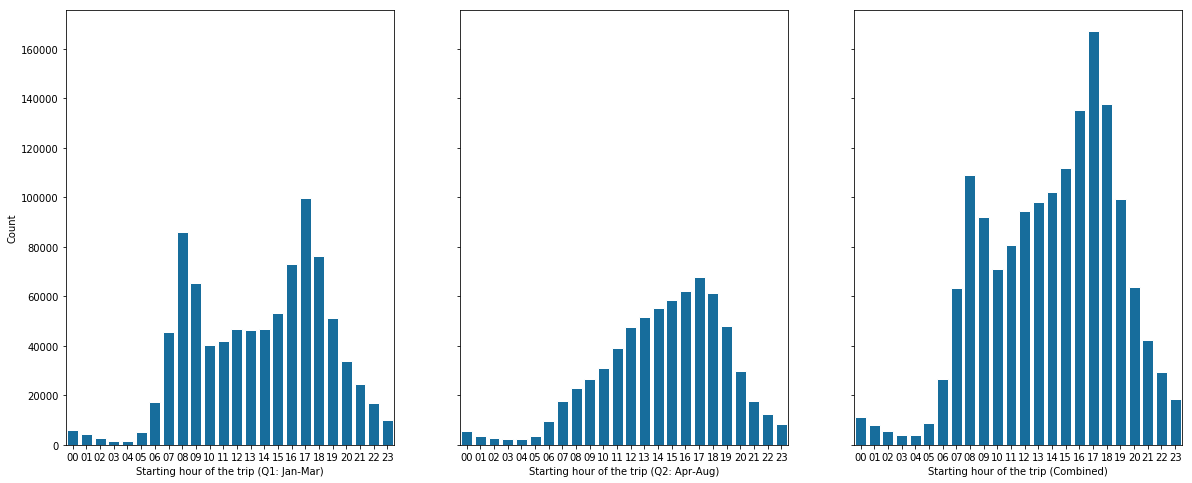

In [35]:
uniplot('started_at_hour', 'hour', annotate=False)

From the plots above, we can see that during the first three months of the year the trips starting hours peaked at around 7:00AM and 5:00PM and the majority of trips were early (7:00AM-9:00AM) and near dusk (4:00PM-6:00PM). The rest of the months followed a different trend which is shown by the left-skewness in the distribution and a general decrease in the frequency which is most likely due to the lockdown/quarantine that was enforced as a counter measure for the pandemic. Adding all the months together, the trend displayed is more similar to that of the first three months

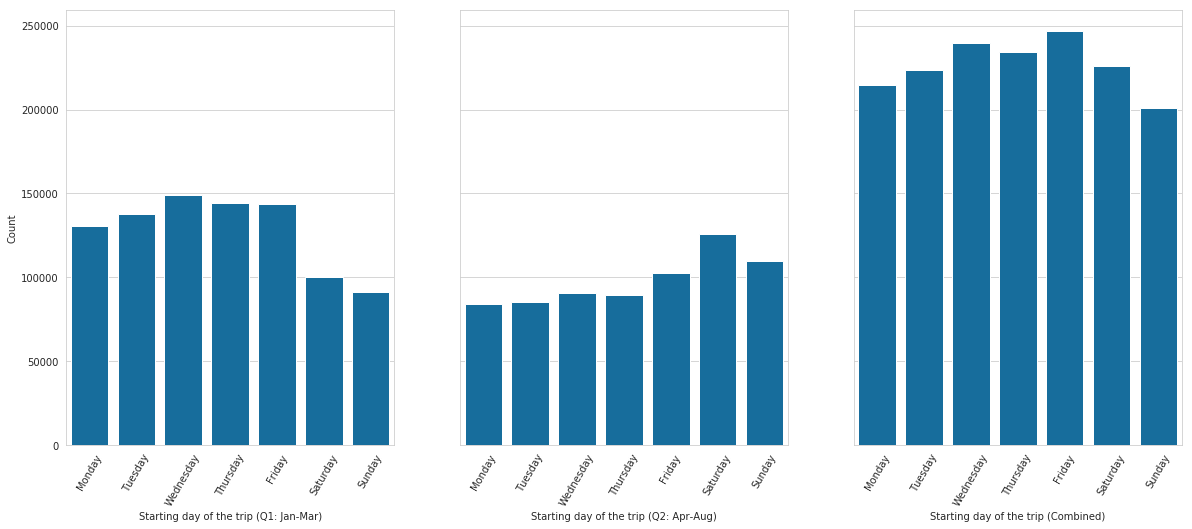

In [36]:
uniplot('started_at_day', 'day', rotate=True)

As shown above, we can see that during the first three months of the year the trips were less frequent on weekends as opposed to work days which may suggest that riders could have been using this to go to work but that may not be necessirly true. On the contrary, as of April, weekends were more popular and had more trips compared to workdays with Saturday peeking the trip count. The combined output is somewhat similar to a normal distribution

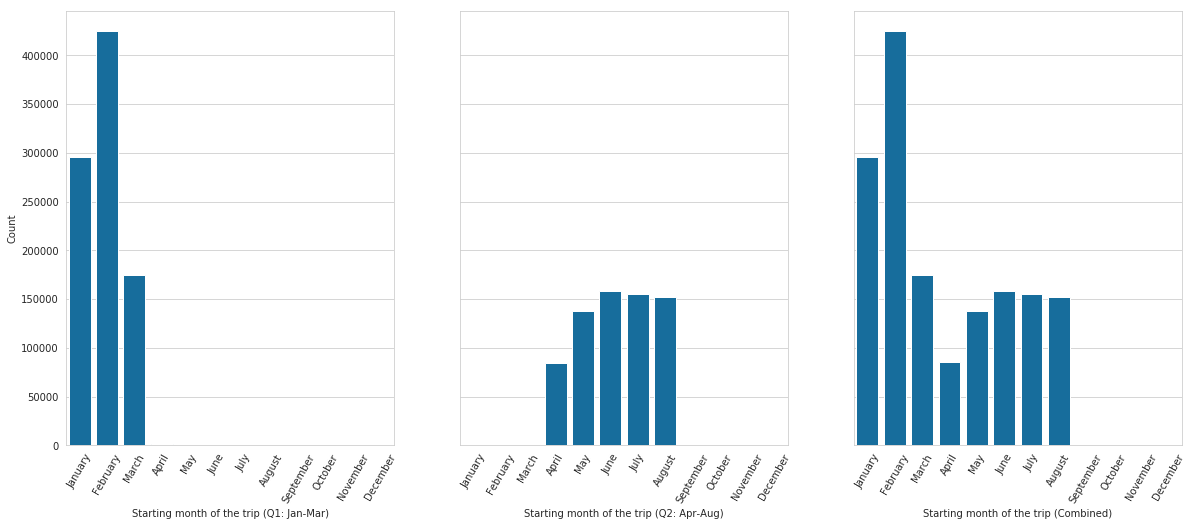

In [37]:
uniplot('started_at_month', 'month', rotate=True, sharex=False)

The plots above show the trip count of the months of this year (2020) as of January till Auguest. We can see that the first three months had more trips than the following months with February peaking followed by January and a sudden drop is shown as of March followed by more decline in April and then a slow return back in May. This again is probably due to the curfews that were imposed due to the pandemic and that people were advised to stay home and avoid contact in order to help contain the pandemic

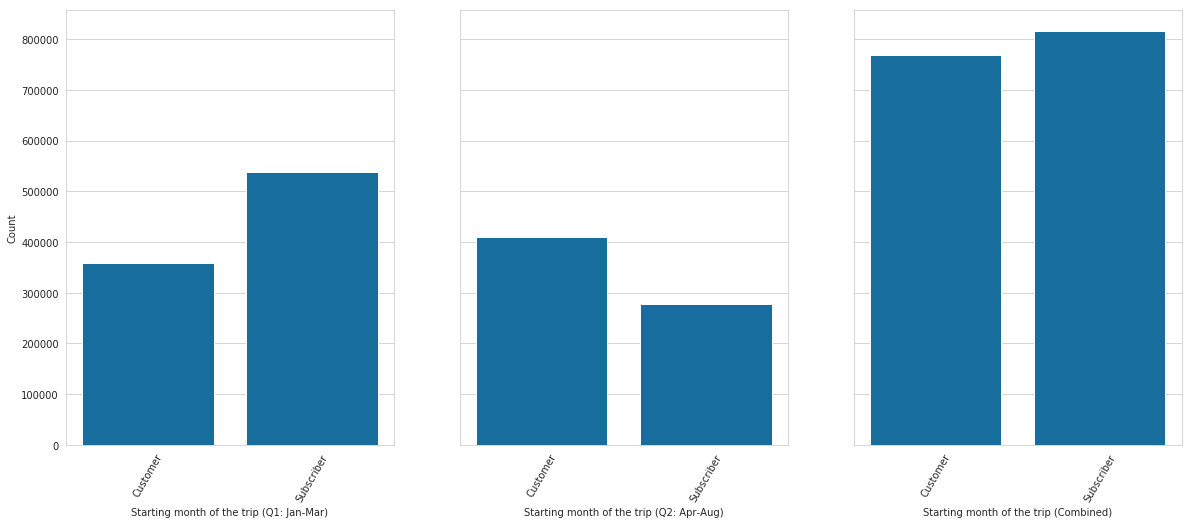

In [38]:
uniplot('user_type', 'month', rotate=True, sharex=True, sharey=True)

The first three months there were more rides coming from subscibers than customers was the opposite of what happened in the following months where the drop in subscribers was noticable as well as the increase in customers but the amount of subscribers is overall more than customers throughtout the year thus far

In [39]:
# Trying to find the value where the majority of the data is as there is a very huge value in the duration which was show by the statistical summary that was done earlier
# with a trip duration of around 811,000 seconds which is very unlikely to be correct

plot_var = pd.DataFrame(trips20_q1_c['duration_min'].append(trips20_q2_c['duration_min']))
percentiles = []
for d in [trips20_q1_c, trips20_q2_c, plot_var]:
    percentiles.append(d['duration_min'].describe(percentiles=[.125, .25, .333, .5, .667, .75, .99]))
percentiles

[count    897495.000000
 mean         13.435756
 std          27.594034
 min           1.000000
 12.5%         4.350000
 25%           6.166667
 33.3%         7.333333
 50%           9.900000
 66.7%        13.216667
 75%          15.516667
 99%          65.816667
 max       13517.950000
 Name: duration_min, dtype: float64, count    688091.000000
 mean         20.796229
 std          38.231998
 min           0.000000
 12.5%         4.433333
 25%           7.233333
 33.3%         9.016667
 50%          13.100000
 66.7%        19.016667
 75%          23.650000
 99%         119.550000
 max        1439.700000
 Name: duration_min, dtype: float64, count    1.585586e+06
 mean     1.662995e+01
 std      3.284243e+01
 min      0.000000e+00
 12.5%    4.366667e+00
 25%      6.516667e+00
 33.3%    7.900000e+00
 50%      1.100000e+01
 66.7%    1.523333e+01
 75%      1.840000e+01
 99%      9.746667e+01
 max      1.351795e+04
 Name: duration_min, dtype: float64]

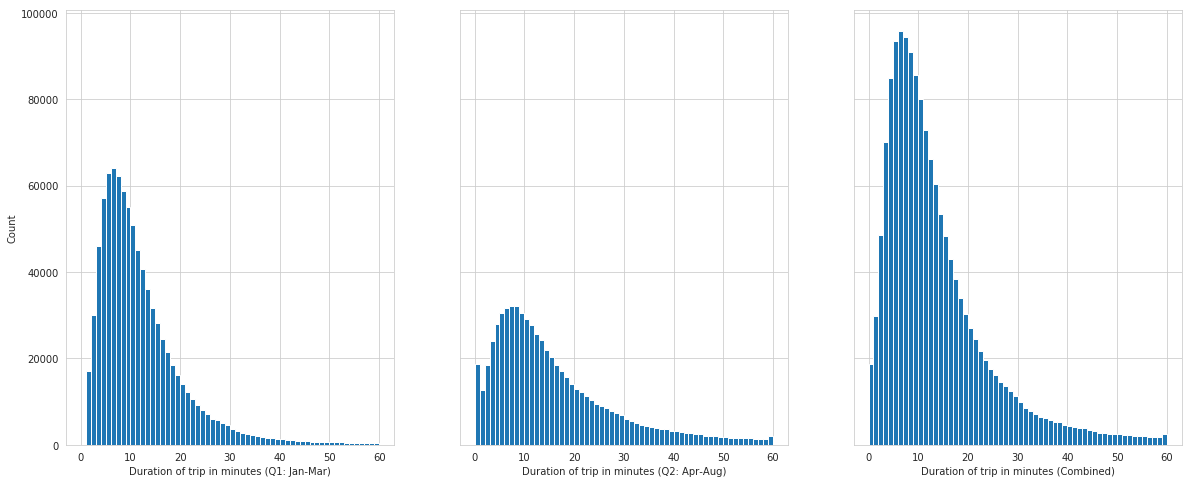

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=[20,8], sharex=True, sharey=True)
bins = np.arange(0, 61, 1)
ticks = np.arange(0, 61, 5)
ax[0].set_ylabel('Count')
for i, (d, a) in enumerate(zip([trips20_q1_c, trips20_q2_c, plot_var], ax)):
    a.hist(data=d, x='duration_min', bins=bins)
    # a.tick_params(ticks)
    if not i:
        a.set_xlabel(f'Duration of trip in minutes (Q{i+1}: Jan-Mar)')
        a.set_ylabel('Count')
    else:
        if i == 1:
            a.set_xlabel(f'Duration of trip in minutes (Q{i+1}: Apr-Aug)')
        elif i == 2:
            a.set_xlabel('Duration of trip in minutes (Combined)')
        else:
            pass
        a.set_ylabel('') 

As we can see, the data is right skewed with higher count in the first 3 months of 2020 which again, is probably due to the lockdown which has happened. We can see that around 99% of the trips were less than an hour long with the majority being from 5 to 10 minutes and given this insight, we will remove the anomaly that we noticed earlier regarding the trip duration

In [41]:
# Finding the top 10 starting stations of the data collected both cumlatively and seperately 

t20q1 = trips20_q1_c['start_station_name'].value_counts()[:10]
t20q2 = trips20_q2_c['start_station_name'].value_counts()[:10]
t20com = pd.DataFrame(trips20_q1_c[['start_station_name', 'end_station_name']].append(trips20_q2_c[['start_station_name', 'end_station_name']]))
t20comb = t20com['start_station_name'].value_counts()[:10]

In [42]:
# Finding the top 10 starting station in Q1 of 2020 (Jan-Mar)

t20q1

Market St at 10th St                                  7651
San Francisco Caltrain (Townsend St at 4th St)        7356
Berry St at 4th St                                    6552
Howard St at Beale St                                 5291
Market St at Steuart St                               4975
Powell St BART Station (Market St at 4th St)          4899
San Francisco Ferry Building (Harry Bridges Plaza)    4712
Powell St BART Station (Market St at 5th St)          4593
Montgomery St BART Station (Market St at 2nd St)      4440
4th St at 16th St                                     3374
Name: start_station_name, dtype: int64

In [43]:
# Finding the top 10 starting station in after Q1 of 2020 (Apr-Aug)

t20q2

Market St at 10th St                            6660
Fell St at Stanyan St                           5327
Hyde St at Post St                              4978
Powell St BART Station (Market St at 4th St)    4770
Mission Dolores Park                            4305
4th St at 16th St                               4111
Market St at Dolores St                         3831
Market St at Steuart St                         3730
Berry St at 4th St                              3628
Sanchez St at 15th St                           3613
Name: start_station_name, dtype: int64

In [44]:
# Finding the top 10 starting station in 2020 collectively

t20comb

Market St at 10th St                                  14311
Berry St at 4th St                                    10180
San Francisco Caltrain (Townsend St at 4th St)         9874
Powell St BART Station (Market St at 4th St)           9669
Market St at Steuart St                                8705
San Francisco Ferry Building (Harry Bridges Plaza)     7740
4th St at 16th St                                      7485
Montgomery St BART Station (Market St at 2nd St)       7099
Howard St at Beale St                                  6773
Fell St at Stanyan St                                  6741
Name: start_station_name, dtype: int64

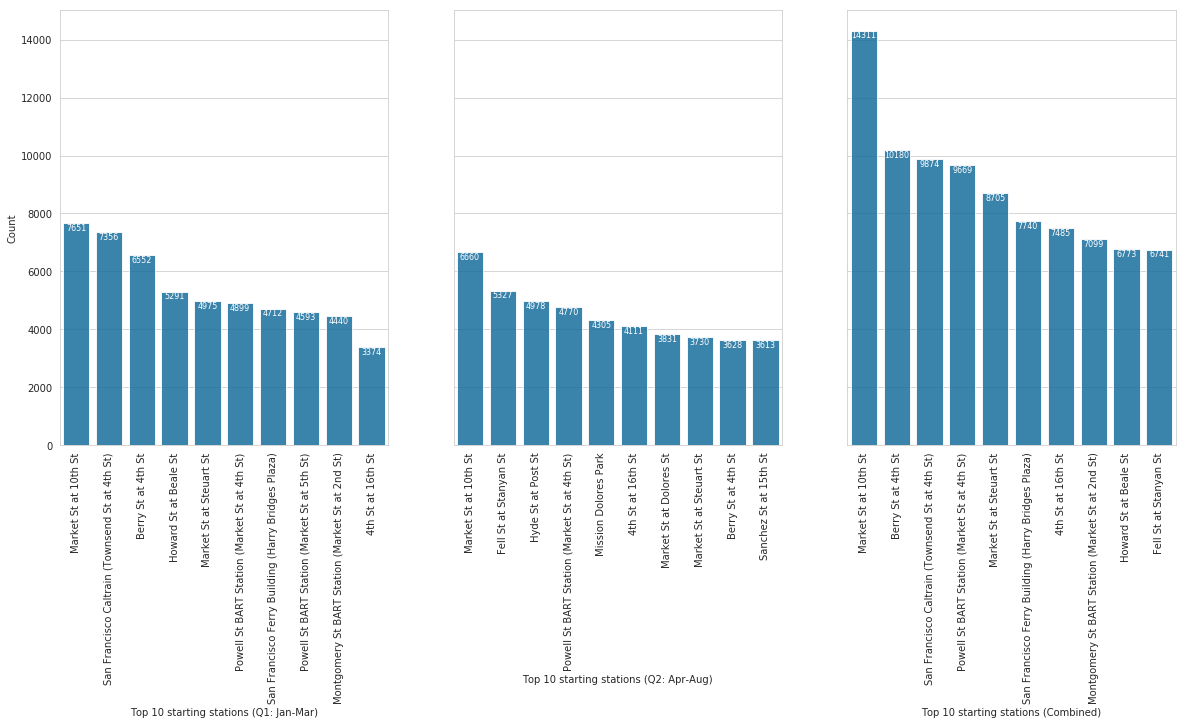

In [45]:
# A plot of the top 10 starting stations

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=[20,8], sharex=False, sharey=True)
for i, (d, a) in enumerate(zip([t20q1, t20q2, t20comb], ax)):
    sb.barplot(d.index, d.values, alpha=.85, color=sb.color_palette('colorblind')[0], ax=a)
    for p in a.patches:
        a.annotate(f'{p.get_height():.0f}', 
                   (p.get_x() + p.get_width()/2, p.get_height()), 
                   ha='center', va='top', color='white', size=8)
    if not i:
        a.set_xlabel(f'Top 10 starting stations (Q{i+1}: Jan-Mar)')
        a.set_ylabel('Count')
    else:
        if i == 1:
            a.set_xlabel(f'Top 10 starting stations (Q{i+1}: Apr-Aug)')
        elif i == 2:
            a.set_xlabel('Top 10 starting stations (Combined)')
        else:
            pass
        a.set_ylabel('') 
    a.tick_params(axis='x', labelrotation=90)
    """
    plt.gca().get_yaxis().set_visible(False)
    sb.despine(fig, left=True)
    plt.tight_layout()
    """

Some stations have changed in popularity as shown in the plots with the majority of the popular stations being those in the period before the lockdown

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>* The number of trips peaked around 7:00AM-9:00AM and 4:00PM-6:00PM
>* The first three months had more rides and could considered more popular which is likely due to the absence of the curfew that was imposed
>* The first three months there were more rides coming from subscibers than customers was the opposite of what happened in the following months where the drop in subscribers was noticable as well as the increase in customers but the amount of subscribers is overall more than customers throughtout the year thus far
>* The majority of trips were from 5 to 10 minutes with the presence of outliers that were over 24 hours (225 hours) which may be a result of the user not logging out of the application or something similar
>* The majoirty of the popular areas in the first months were different from those after. The areas that showed up in both periods may indicate that they were not heavily impacted by the lockdown or suffered from little to no infections of the virus
>* The data was rather straightforward and clear which required no transformation

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The data was set to their appropriate types to allow better utilization of the features and derive additional information that may prove to be useful. The trip duration in particular was rather peculiar as the outlier(s) in it made the data look strange which was resolved by removing the outlier(s) to focus more on the range of trip duration which most of the data fell in

## Bivariate Exploration

In [46]:
def biplot(x=None, y=None, var=None, rotate=False, sharex=True, sharey=True, fn=sb.countplot, ylabel='', annotate=False):
    """
    Draws a plot of one variable against another for analysis
    
    Args:
        x: Data that will be plotted on X-axis
        y: Data that will be plotted on Y-axis
        var: Name of the variable that will be plotted (used for the axis label)
        rotate: if True, the x labels will be rotated by 60 degrees
        sharex: Make the x axis ticks common across all (sub)plots
        sharey: Make the y axis ticks common across all (sub)plots
        fn: The plotting function that will be used on the variables
        ylabel: The label of the Y-axis
        annotate: if True, the frequency of the variable will be displayed on the graph itself
     
     Returns:
         None
    
    """    
    plot_var = pd.DataFrame(trips20_q1_c[[x, 'duration_min']].append(trips20_q2_c[[x, 'duration_min']]))
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=[20,8], sharex=True, sharey=True)
    for i, (d, a) in enumerate(zip([trips20_q1_c, trips20_q2_c, plot_var], ax)):
        if fn is sb.violinplot:
            fn(data=d[d['duration_min'] <= percentiles[i][-2]], x=x, y='duration_min', color=sb.color_palette('colorblind')[0], inner='quartile', ax=a)
        else:
            fn(data=d[d['duration_min'] <= percentiles[i][-2]], x=x, y='duration_min', color=sb.color_palette('colorblind')[0], ax=a)
        if annotate:    
            for p in a.patches:
                a.annotate(f'{p.get_height():.0f}',
                           (p.get_x() + p.get_width()/2, p.get_height()), 
                           ha='center', va='bottom', color='black', size=8)
        if not i:
            a.set_xlabel(f'{var} Q{i+1}(Jan-Mar)')
            a.set_ylabel(ylabel)
        else:
            if i == 1:
                a.set_xlabel(f'{var} Q{i+1}(Apr-Aug)')
            elif i == 2:
                a.set_xlabel(f'{var} (Combined)')
            else:
                pass
            a.set_ylabel('')
        if rotate:    
            a.tick_params(axis='x', labelrotation=60)  
    plt.show()

How much does the trip duration vary between the customers and subscribers?

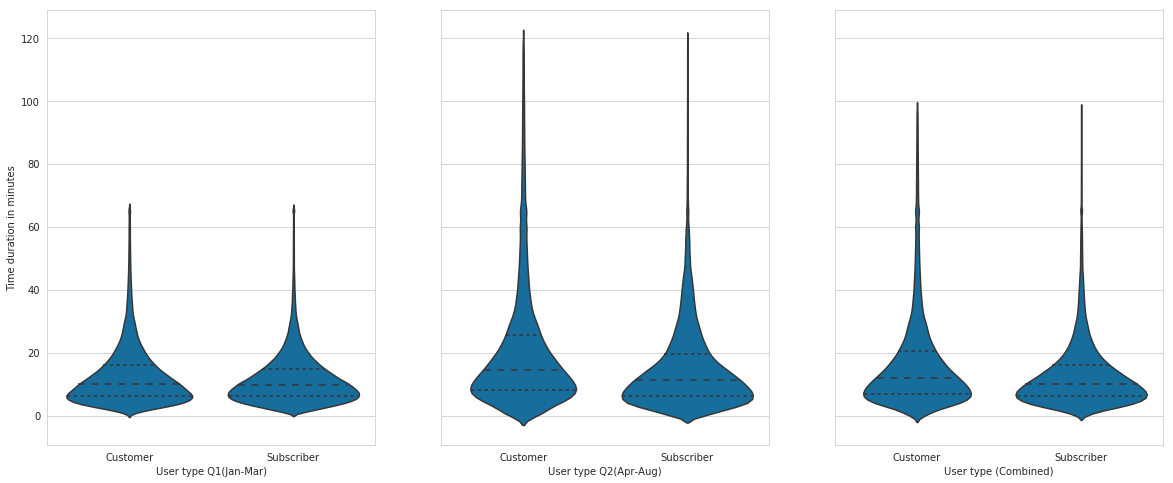

In [47]:
biplot(x='user_type', y='duration_sec', fn=sb.violinplot, var='User type', ylabel='Time duration in minutes')

The duration of the trips made by the customers and the subscribers in the first three months is very similar but in the following months the subscribers had lower trip durations which can help us assume that the subscribers use the bikes for a goal or perform certain tasks/targets

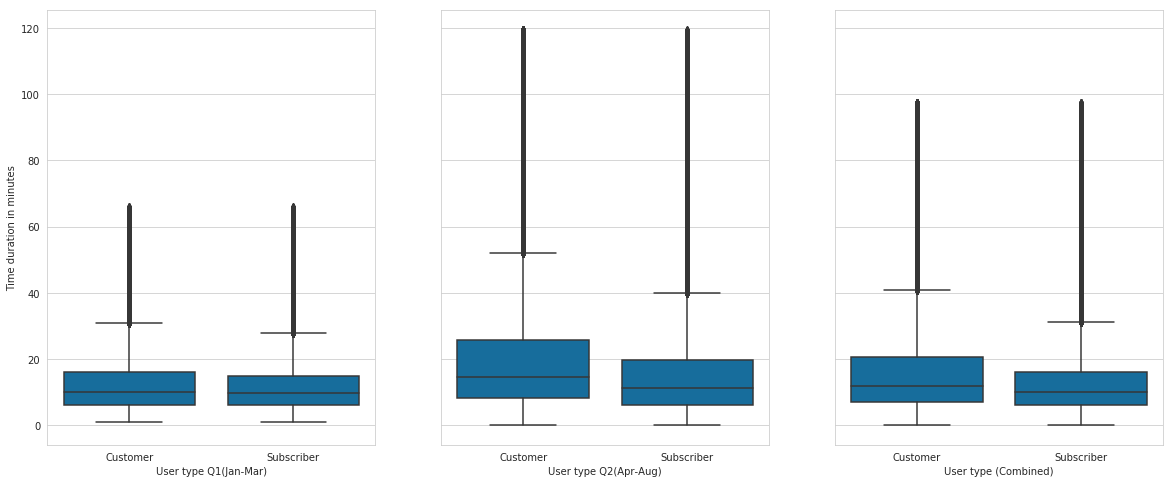

In [48]:
biplot(x='user_type', y='duration_sec', fn=sb.boxplot, var='User type', ylabel='Time duration in minutes')

This is same data as above but in box plot format which helps in getting insights in a better way and as was mentioned earlier customers tend to have longer rides in comparison to subscribers which is visually obvious by the whiskers and the (inter)quartile ranges show in the figure

How much does the trip duration vary between the months?

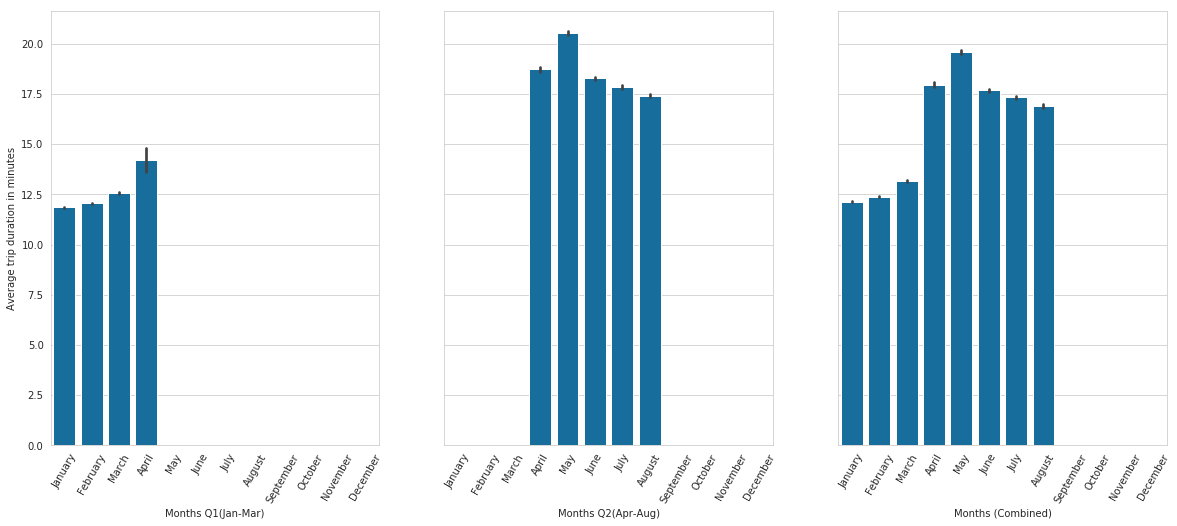

In [49]:
biplot(x='started_at_month', y='duration_sec', fn=sb.barplot, var='Months', ylabel='Average trip duration in minutes', rotate=True)

Unlike the previous plots, the trip durations in the first three months is much smaller than those of the following months. There has been a massive increase in April and May with a slight drop afterwards. This may be due to the weather in the areas in addition to what has been rumored that the heat will reduce the spread of COVID-19

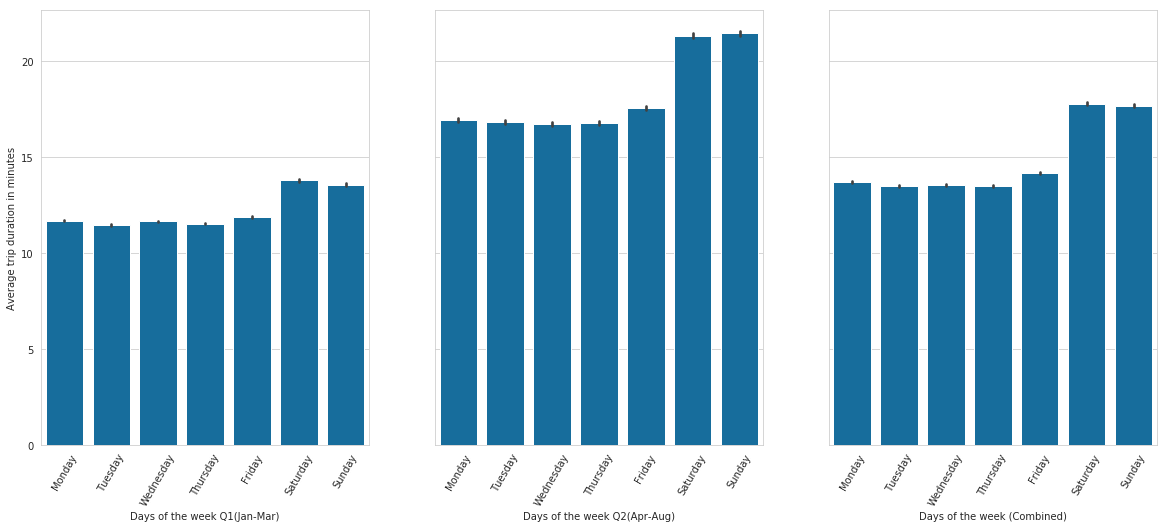

In [50]:
biplot(x='started_at_day', y='duration_sec', fn=sb.barplot, var='Days of the week', ylabel='Average trip duration in minutes', rotate=True)

The trips are quite shorter on the work days (Monday through Friday) relative to the weekends which indicates a somewhat optimal usage of the sharing system on work days with more flexibility on weekends

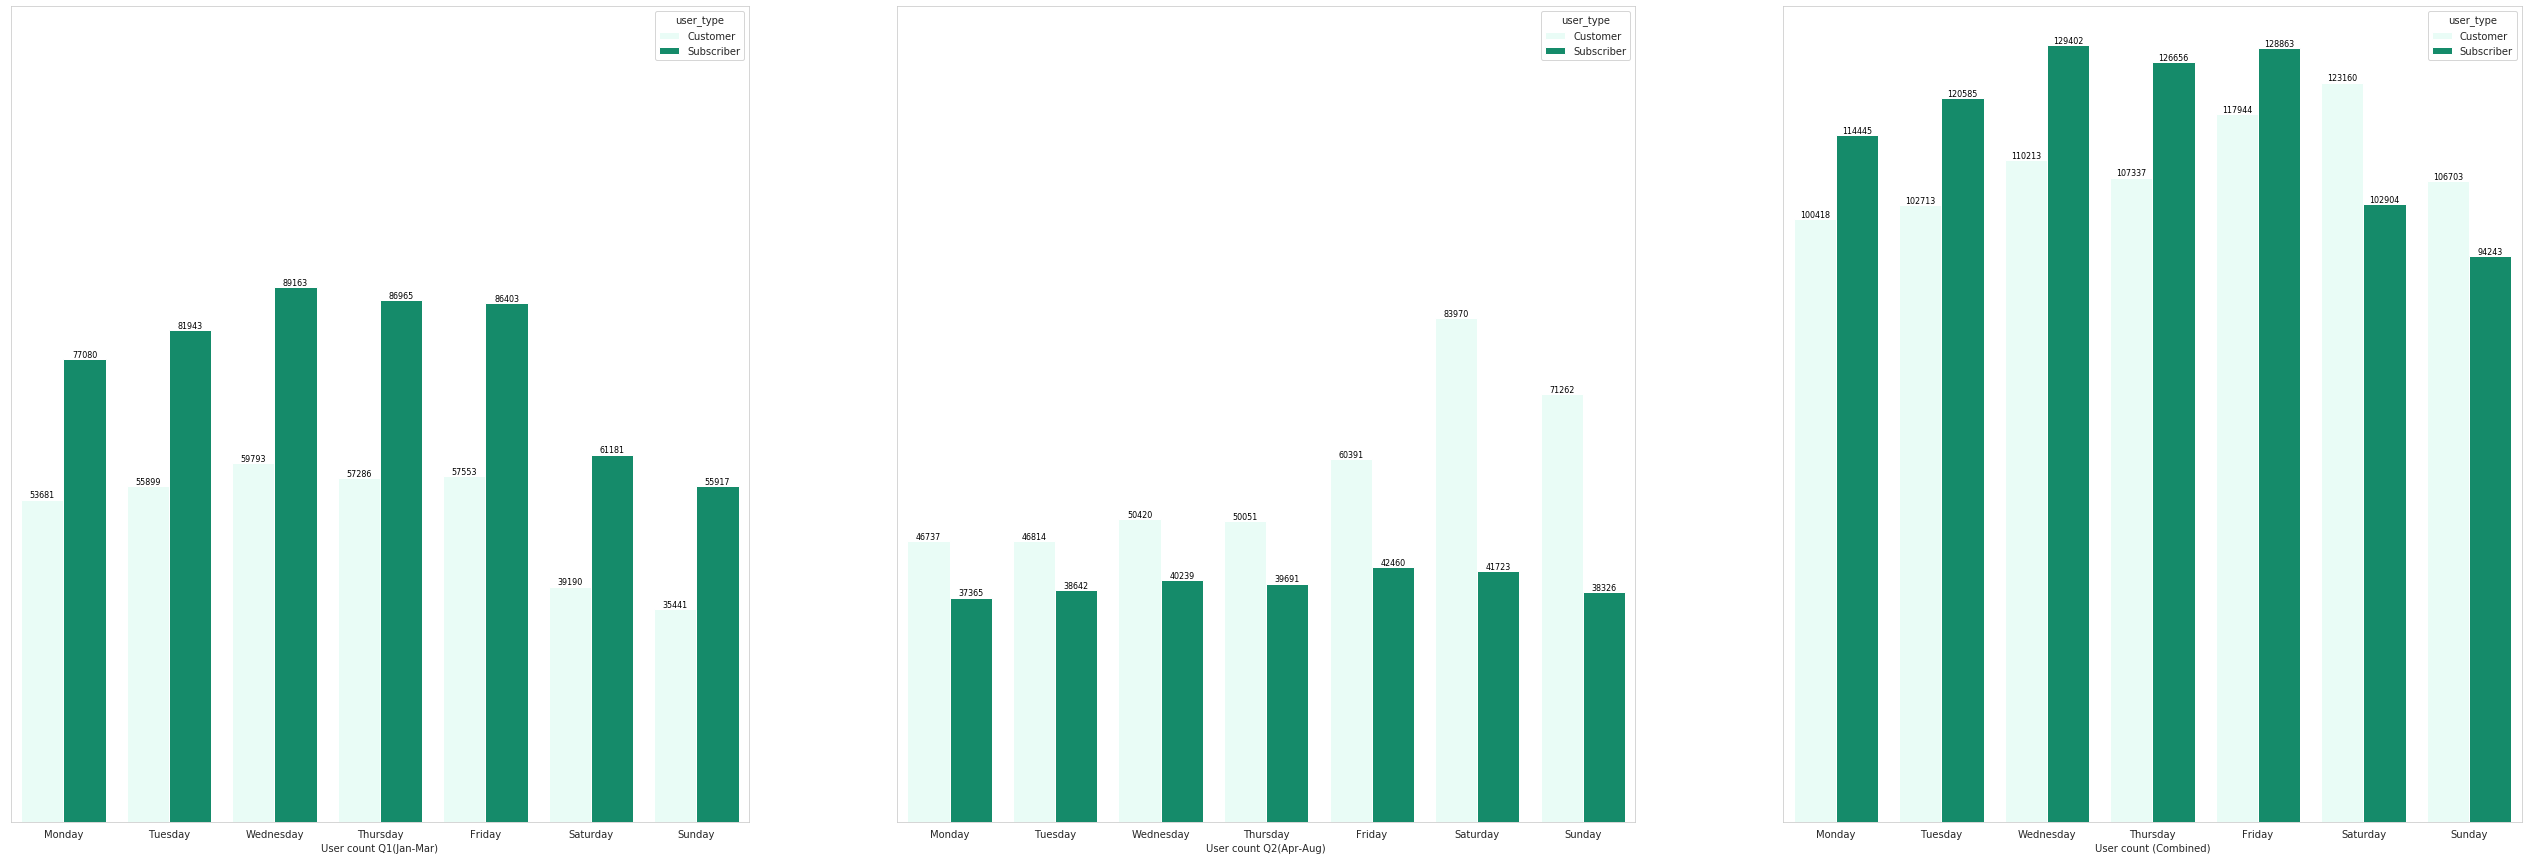

In [51]:
plot_var = pd.DataFrame(trips20_q1_c[['user_type', 'started_at_day']].append(trips20_q2_c[['user_type', 'started_at_day']]))
data = [trips20_q1_c, trips20_q2_c, plot_var]
cust, subs = [], []
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=[45,15], sharex=True, sharey=True)
for i, v in enumerate(list()):
    pass
for i, (d, a) in enumerate(zip(data, ax)):
    sb.countplot(data=d, x='started_at_day', hue='user_type', color=sb.color_palette('colorblind')[2], ax=a)
    for p in a.patches:
        a.annotate(f'{p.get_height():.0f}',
                   (p.get_x() + p.get_width()/2, p.get_height()), 
                   ha='center', va='bottom', color='black', size=8)
    if not i:
        a.set_xlabel(f'User count Q{i+1}(Jan-Mar)')
        a.set_ylabel('Hour of the day')
    else:
        if i == 1:
            a.set_xlabel(f'User count Q{i+1}(Apr-Aug)')
        elif i == 2:
            a.set_xlabel(f'User count (Combined)')
        else:
            pass
    a.set_ylabel('')
    a.get_yaxis().set_visible(False)

There is more subscriber usage in general than customers which was shown earlier by the box and violin plots. There is a noticable drop in the trip volume on the week ends which may indicate that most subscribers use the bikes as a commuter or a method of reaching their jobs (for those who had to be physically present given the pandemic) whlist customers may have been using the bikes as a sort of leaisure/sport/activity in their free time. Another point worth mentioning is that the amount of customers during the months of April through August has been far more than the subscribers

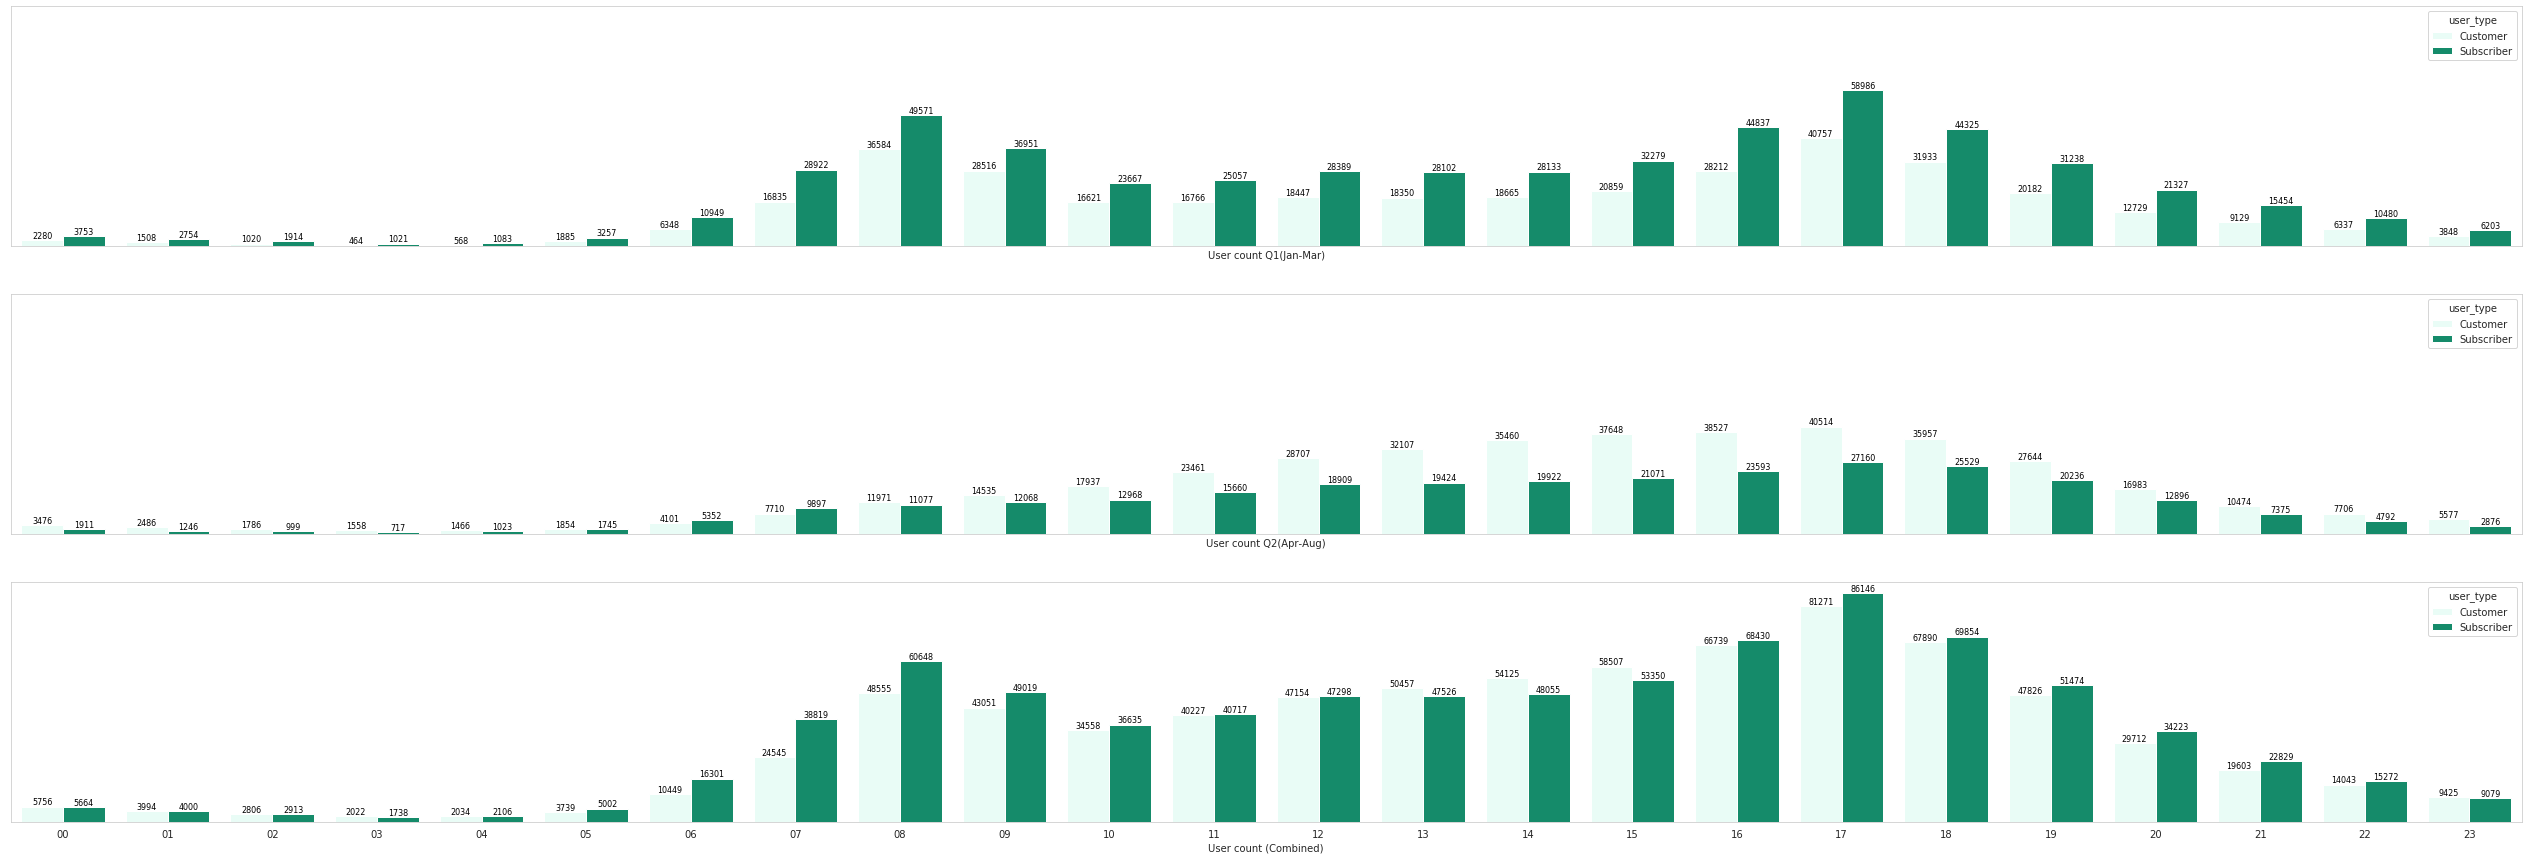

In [52]:
plot_var = pd.DataFrame(trips20_q1_c[['user_type', 'started_at_hour']].append(trips20_q2_c[['user_type', 'started_at_hour']]))
data = [trips20_q1_c, trips20_q2_c, plot_var]
cust, subs = [], []
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=[45,15], sharex=True, sharey=True)
for i, v in enumerate(list()):
    pass
for i, (d, a) in enumerate(zip(data, ax)):
    sb.countplot(data=d, x='started_at_hour', hue='user_type', color=sb.color_palette('colorblind')[2], ax=a)
    for p in a.patches:
        a.annotate(f'{p.get_height():.0f}',
                   (p.get_x() + p.get_width()/2, p.get_height()), 
                   ha='center', va='bottom', color='black', size=8)
    if not i:
        a.set_xlabel(f'User count Q{i+1}(Jan-Mar)')
        a.set_ylabel('Hour of the day')
    else:
        if i == 1:
            a.set_xlabel(f'User count Q{i+1}(Apr-Aug)')
        elif i == 2:
            a.set_xlabel(f'User count (Combined)')
        else:
            pass
    a.set_ylabel('')
    a.get_yaxis().set_visible(False)

There is more subscriber usage in general than customers which was shown earlier by the box and violin plots. The popular hours for the customers were around 11:00AM to 3:00PM which is rather strange given that this period of time is considered as the rush hour(s) however, this year was under different circumstances than the previous years as a result of COVID-19

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>* Subscriber usage is more than customers in general
>* Subscribers appear to use the bike system as a method of transportation to their jobs while customers uses it for fun/leaisure
>* The Summer period seem to be more popular than the earlier months
>* Customers tend to ride more around mid-day to noon with a longer trip duration

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> May had the most bike usage in the recorded months thus far and subscribers are more inclined to take shorter rides

## Multivariate Exploration

In [53]:
df_temp.head(5)

,user_type,end_lat,end_lng,end_station_name,start_lat,start_lng,start_station_name,duration_min,started_at_month,started_at,ended_at,trip_distance
4,Customer,37.802746,-122.413579,Lombard St at Columbus Ave,37.796389,-122.394586,Pier 1/2 at The Embarcadero,928.333333,January,2020-01-31 17:12:33.460,2020-02-01 08:40:53.646,1.815455
5,Customer,37.773793,-122.421239,Market St at Franklin St,37.774520,-122.409449,8th St at Ringold St,188.883333,January,2020-01-31 22:48:22.639,2020-02-01 01:57:15.716,1.041813
6,Customer,37.773793,-122.421239,Market St at Franklin St,37.774520,-122.409449,8th St at Ringold St,189.016667,January,2020-01-31 22:48:12.989,2020-02-01 01:57:14.165,1.041813
9,Customer,37.807813,-122.264496,Snow Park,37.871719,-122.273068,MLK Jr Way at University Ave,33.000000,January,2020-01-31 23:49:09.230,2020-02-01 00:22:09.754,7.133165
10,Customer,37.807813,-122.264496,Snow Park,37.871719,-122.273068,MLK Jr Way at University Ave,32.816667,January,2020-01-31 23:49:03.972,2020-02-01 00:21:53.573,7.133165


Which group is considered faster than the other? Subscribers or Customers?

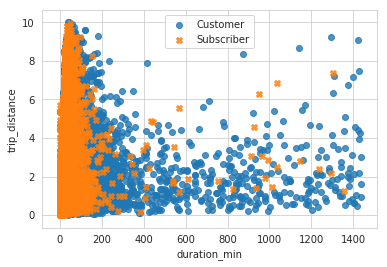

In [54]:
bins_x = np.arange(0, 11, 1)
bins_y = np.arange(0, 110, 10)
markers = [('Customer', 'o'), ('Subscriber', 'X')]
for usr, m in markers:
    d = df_temp[df_temp['trip_distance'] <= 10]
    d = d.sample(round(len(d)/2), random_state=1)
    p = d[d['user_type'] == usr]
    sb.regplot(data=p, x='duration_min', y='trip_distance', marker=m, fit_reg=False)
plt.legend(['Customer', 'Subscriber']);

We can see that the majority of the subscribers are faster as the lower duration period with respect to the trip is distance has more density(subscribers) which reaffirms our deduction earlier that subscribers do indeed take shorter trips and use it as method of transportation for its ease of use and little to no impairment due to traffic jams or blockages and such

In [55]:
import matplotlib.dates as mdates

In [56]:
time_bins = df_temp['started_at'].apply(lambda r: int(mdates.epoch2num(r.value/1e9)))

In [57]:
df_temp['started_at_epoch'] = time_bins

In [58]:
df_temp.head(5)

,user_type,end_lat,end_lng,end_station_name,start_lat,start_lng,start_station_name,duration_min,started_at_month,started_at,ended_at,trip_distance,started_at_epoch
4,Customer,37.802746,-122.413579,Lombard St at Columbus Ave,37.796389,-122.394586,Pier 1/2 at The Embarcadero,928.333333,January,2020-01-31 17:12:33.460,2020-02-01 08:40:53.646,1.815455,737455
5,Customer,37.773793,-122.421239,Market St at Franklin St,37.774520,-122.409449,8th St at Ringold St,188.883333,January,2020-01-31 22:48:22.639,2020-02-01 01:57:15.716,1.041813,737455
6,Customer,37.773793,-122.421239,Market St at Franklin St,37.774520,-122.409449,8th St at Ringold St,189.016667,January,2020-01-31 22:48:12.989,2020-02-01 01:57:14.165,1.041813,737455
9,Customer,37.807813,-122.264496,Snow Park,37.871719,-122.273068,MLK Jr Way at University Ave,33.000000,January,2020-01-31 23:49:09.230,2020-02-01 00:22:09.754,7.133165,737455
10,Customer,37.807813,-122.264496,Snow Park,37.871719,-122.273068,MLK Jr Way at University Ave,32.816667,January,2020-01-31 23:49:03.972,2020-02-01 00:21:53.573,7.133165,737455


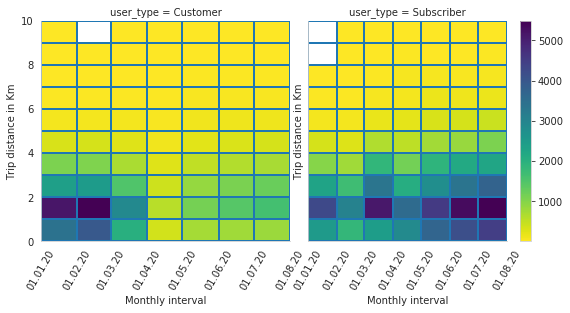

In [59]:
bins_x = np.arange(0, 11, 1)
t_bins = []
for i in range(1,9):
    date = datetime.datetime(year=2020, month=i, day=1)
    t_bins.append(date.timestamp())
t_bins = mdates.epoch2num(t_bins)  
d = df_temp[df_temp['trip_distance'] <= 10]
d = d.sample(round(len(d)/2), random_state=1)
grid = sb.FacetGrid(data=d, col='user_type', height=4)
# grid.map(plt.hist2d, 'started_at_month', 'trip_distance', cmin=0.5, cmap='viridis_r') #, bins=[bins_x, bins_y]);
grid.map(plt.hist2d, 'started_at_epoch', 'trip_distance', cmin=0.5, cmap='viridis_r', bins=[t_bins, bins_x]);
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
for a in grid.axes.flatten():
    a.set_xlabel('Monthly interval')
    a.set_ylabel('Trip distance in Km')
    a.tick_params(axis='x', labelrotation=60) 
plt.colorbar();

Customers had more (shorter) trips than the Subscribers (January has two white slots in the subscribers which indicates almost no activity) in both January and February while the Subscribers while the Subscribers overall had more trips the customers

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The data provided from the plots above reaffirm the previous deduction. Subscriber usage is more than customers in general and they use the bike system as a way to commute while customers uses it for fun/leaisure. The Summer period seem to be more popular than the earlier months for both user types with the customers tending to go for longer trips


### Were there any interesting or surprising interactions between features?

> Regarding the interactions between features, it is found that all features are supplementing each other which is a very sensible and reasonable thing when we look them combined so there's no "surprising" interactions.

In [60]:
!wget -O output_toggle.tpl https://raw.githubusercontent.com/tcstewar/syde556/master/output_toggle.tpl

--2020-09-19 12:03:20--  https://raw.githubusercontent.com/tcstewar/syde556/master/output_toggle.tpl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 501 [text/plain]
Saving to: ‘output_toggle.tpl’

100%[======================================>] 501         --.-K/s   in 0s      

2020-09-19 12:03:20 (22.1 MB/s) - ‘output_toggle.tpl’ saved [501/501]



In [64]:
!wget -O exploration_template.ipynb https://dataplatform.cloud.ibm.com/data/notebooks/converter/assets/7b7cd3ad-9fa0-4d8f-9555-06c9674173cc?format=ipynb\&project=50649871-58c0-4c8c-a3ab-2e053456f2a7

--2020-09-19 13:48:31--  https://dataplatform.cloud.ibm.com/data/notebooks/converter/assets/7b7cd3ad-9fa0-4d8f-9555-06c9674173cc?format=ipynb&project=50649871-58c0-4c8c-a3ab-2e053456f2a7
Resolving dataplatform.cloud.ibm.com (dataplatform.cloud.ibm.com)... 169.60.18.30, 169.61.20.206, 169.61.138.198
Connecting to dataplatform.cloud.ibm.com (dataplatform.cloud.ibm.com)|169.60.18.30|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /auth/iamid/login [following]
--2020-09-19 13:48:31--  https://dataplatform.cloud.ibm.com/auth/iamid/login
Reusing existing connection to dataplatform.cloud.ibm.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://identity-1.us-south.iam.cloud.ibm.com/identity/authorize?response_type=code&redirect_uri=https%3A%2F%2Fdataplatform.cloud.ibm.com%2Fauth%2Fiamid%2Fcallback&state=%2Fdata%2Fnotebooks%2Fconverter%2Fassets%2F7b7cd3ad-9fa0-4d8f-9555-06c9674173cc%3Fformat%3Dipynb%26project%3D50649871-58c0-4c8c-a3ab-2e053

In [ ]:
!jupyter nbconvert exploration_template.ipynb --to slides --post serve --template output_toggle